1. Explain Clustering algorithms and their use cases


          Clustering is a fundamental unsupervised learning technique used to group a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups.

          K-Means=K-means clustering is a popular clustering algorithm that partitions data into K clusters, where K is a user-defined parameter. The algorithm works by iteratively assigning data points to the nearest cluster center and updating the cluster centers based on the assigned data points.

          Hierarchical=Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters by iteratively merging or splitting clusters based on their similarity. The algorithm works by iteratively merging or splitting clusters based on their similarity.

          DBSCAN=DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on their density. The algorithm works by iteratively assigning data points to the nearest cluster center and updating the cluster centers based on the assigned data points.




2. Presentation: Model Evaluation techniques in Unsupervised Learning


          Unsupervised learning is a type of machine learning where the model learns patterns from data without labeled outputs. Unlike supervised learning, there is no ground truth to directly measure accuracy. Therefore, special evaluation techniques are used to assess the performance and quality of unsupervised models such as clustering and dimensionality reduction.

          Model evaluation helps to:

          Measure how well the model discovers hidden patterns.

          Compare different unsupervised algorithms.

          Select the best model for the dataset.

          Ensure meaningful and reliable results.

          Since there are no labels, evaluation focuses on structure, similarity, and separation of data.

          Types of Unsupervised Learning Models

          The main types include:

          Clustering (K-Means, DBSCAN, Hierarchical)

          Dimensionality Reduction (PCA, t-SNE)

          Anomaly Detection (Isolation Forest, LOF)

          Each requires different evaluation approaches.


          Internal Evaluation Methods

          Internal evaluation measures performance using only the dataset itself.

          1. Silhouette Score

          Measures how similar a data point is to its own cluster compared to other clusters.

          Range: -1 to +1

          +1 → Good clustering

          0 → Overlapping clusters

          -1 → Poor clustering

          Formula concept:
          Silhouette Score = (b − a) / max(a, b)

          Where:

          a = average distance within cluster

          b = average distance to nearest cluster

    

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Load dataset
data = pd.read_csv('C:\\Users\\prince\\OneDrive\\Desktop\\customer_segmentation.csv')


data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Select numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values
numeric_data = numeric_data.dropna()

numeric_data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

scaled_data[:5]

array([[-1.98092985e-02, -9.86442928e-01,  2.34062698e-01,
        -8.23039324e-01, -9.28972240e-01,  3.10532125e-01,
         9.78225747e-01,  1.54942946e+00,  1.69022683e+00,
         2.45456767e+00,  1.48482696e+00,  8.50030572e-01,
         3.51713479e-01,  1.42855332e+00,  2.50471216e+00,
        -5.54142891e-01,  6.93231972e-01, -2.81772969e-01,
        -2.82704841e-01, -2.80838916e-01, -2.61661482e-01,
        -1.17148181e-01, -9.78120554e-02,  0.00000000e+00,
         0.00000000e+00,  2.37795178e+00],
       [-1.05100909e+00, -1.23680074e+00, -2.34559480e-01,
         1.03993835e+00,  9.09065692e-01, -3.80509438e-01,
        -8.72023832e-01, -6.37327818e-01, -7.17986120e-01,
        -6.51037869e-01, -6.33880182e-01, -7.32867280e-01,
        -1.68231197e-01, -1.12588116e+00, -5.71082392e-01,
        -1.16951781e+00, -1.31574498e-01, -2.81772969e-01,
        -2.82704841e-01, -2.80838916e-01, -2.61661482e-01,
        -1.17148181e-01, -9.78120554e-02,  0.00000000e+00,
         0.00

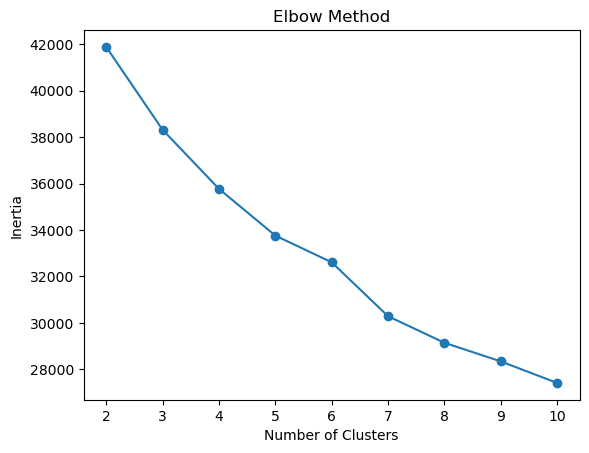

In [5]:
inertia = []
K = range(2,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate
kmeans_score = silhouette_score(scaled_data, kmeans_labels)
print('KMeans Silhouette Score:', kmeans_score)

KMeans Silhouette Score: 0.1806675852077269


In [7]:
# Apply Hierarchical clustering
hier = AgglomerativeClustering(n_clusters=4)
hier_labels = hier.fit_predict(scaled_data)

# Evaluate
hier_score = silhouette_score(scaled_data, hier_labels)
print('Hierarchical Silhouette Score:', hier_score)

Hierarchical Silhouette Score: 0.2048355994667295


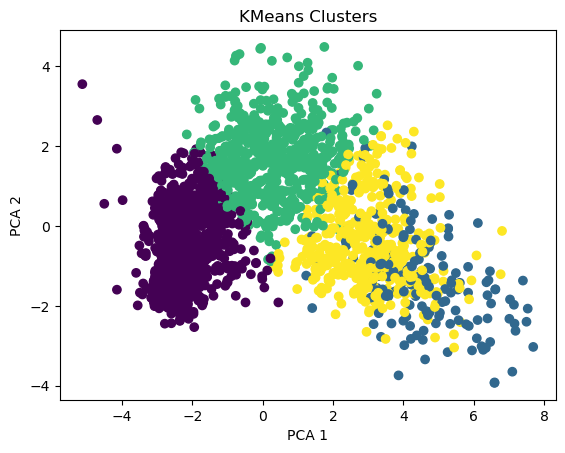

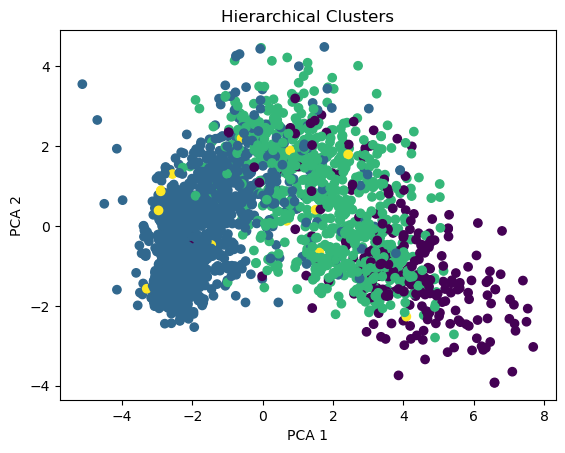

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# KMeans plot
plt.figure()
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels)
plt.title('KMeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Hierarchical plot
plt.figure()
plt.scatter(pca_data[:,0], pca_data[:,1], c=hier_labels)
plt.title('Hierarchical Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [10]:
# Select numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Remove missing values and keep index
numeric_data_clean = numeric_data.dropna()

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_clean)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Hierarchical
hier = AgglomerativeClustering(n_clusters=4)
hier_labels = hier.fit_predict(scaled_data)

# Assign clusters ONLY to cleaned data
numeric_data_clean['KMeans_Cluster'] = kmeans_labels
numeric_data_clean['Hierarchical_Cluster'] = hier_labels

# Merge back with original data
final_data = data.loc[numeric_data_clean.index]

final_data['KMeans_Cluster'] = kmeans_labels
final_data['Hierarchical_Cluster'] = hier_labels

# Save
final_data.to_csv("customer_segmentation_clustered.csv", index=False)

print("Saved successfully")


C:\Users\prince\AppData\Local\Temp\ipykernel_22808\2268603650.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_clean['KMeans_Cluster'] = kmeans_labels
C:\Users\prince\AppData\Local\Temp\ipykernel_22808\2268603650.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_clean['Hierarchical_Cluster'] = hier_labels


Saved successfully
